In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('diabetic_data.csv')
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


## Priprema za klasterovanje

### Brisanje nedostajućih vrednosti, enkodiranje, feature selection

In [3]:
bitni=['diag_1', 'diag_2', 'diag_3', 'max_glu_serum' ,'A1Cresult']


for b in bitni:
    most_frequent_value = data[b].mode().values[0]
    data[b] = data[b].replace(['?', 'None'], most_frequent_value)

In [4]:
data.drop(['race','weight','payer_code','medical_specialty','encounter_id','patient_nbr', 'examide', 'citoglipton'], axis=1,inplace=True)

In [5]:
feature_names = data.columns[0:]
feature_names

Index(['gender', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

for c in categorical_cols:
    data[c] = label_encoder.fit_transform(data[c])

In [7]:
kopija=data.copy()
kopija

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,0,6,25,1,1,41,0,1,0,...,0,1,1,0,0,0,0,1,0,2
1,0,1,1,1,7,3,59,0,18,0,...,0,3,1,0,0,0,0,0,1,1
2,0,2,1,1,7,2,11,5,13,2,...,0,1,1,0,0,0,0,1,1,2
3,1,3,1,1,7,2,44,1,16,0,...,0,3,1,0,0,0,0,0,1,2
4,1,4,1,1,7,1,51,0,8,0,...,0,2,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,7,1,3,7,3,51,0,16,0,...,0,0,1,0,0,0,0,0,1,1
101762,0,8,1,4,5,5,33,3,18,0,...,0,2,1,0,0,0,0,1,1,2
101763,1,7,1,1,7,1,53,0,9,1,...,0,0,1,0,0,0,0,0,1,2
101764,0,8,2,3,7,10,45,2,21,0,...,0,3,1,0,0,0,0,0,1,2


In [8]:
X = kopija.drop(['readmitted'], axis=1)

In [9]:
y = data['readmitted']

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,0.0,0.000000,0.714286,0.888889,0.000000,0.000000,0.305344,0.000000,0.0000,0.000000,...,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.111111,0.000000,0.000000,0.250000,0.153846,0.442748,0.000000,0.2125,0.000000,...,0.0,0.0,1.000000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.222222,0.000000,0.000000,0.250000,0.076923,0.076336,0.833333,0.1500,0.047619,...,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,1.0,1.0
3,0.5,0.333333,0.000000,0.000000,0.250000,0.076923,0.328244,0.166667,0.1875,0.000000,...,0.0,0.0,1.000000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0
4,0.5,0.444444,0.000000,0.000000,0.250000,0.000000,0.381679,0.000000,0.0875,0.000000,...,0.0,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0.5,0.777778,0.000000,0.074074,0.250000,0.153846,0.381679,0.000000,0.1875,0.000000,...,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0
101762,0.0,0.888889,0.000000,0.111111,0.166667,0.307692,0.244275,0.500000,0.2125,0.000000,...,0.0,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,1.0,1.0
101763,0.5,0.777778,0.000000,0.000000,0.250000,0.000000,0.396947,0.000000,0.1000,0.023810,...,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0
101764,0.0,0.888889,0.142857,0.074074,0.250000,0.692308,0.335878,0.333333,0.2500,0.000000,...,0.0,0.0,1.000000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [19]:
pca_names = [f'Komponenta {i}' for i in range(pca.n_components_)]
pca_names

['Komponenta 0', 'Komponenta 1']

In [20]:
pca.explained_variance_ratio_[:2].sum()


0.8280051709326375

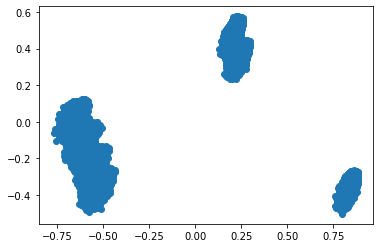

In [21]:
_ = plt.scatter(X[:, 0], X[:, 1])


In [27]:
pca

PCA(n_components=2)

## Klasterovanje

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, homogeneity_score

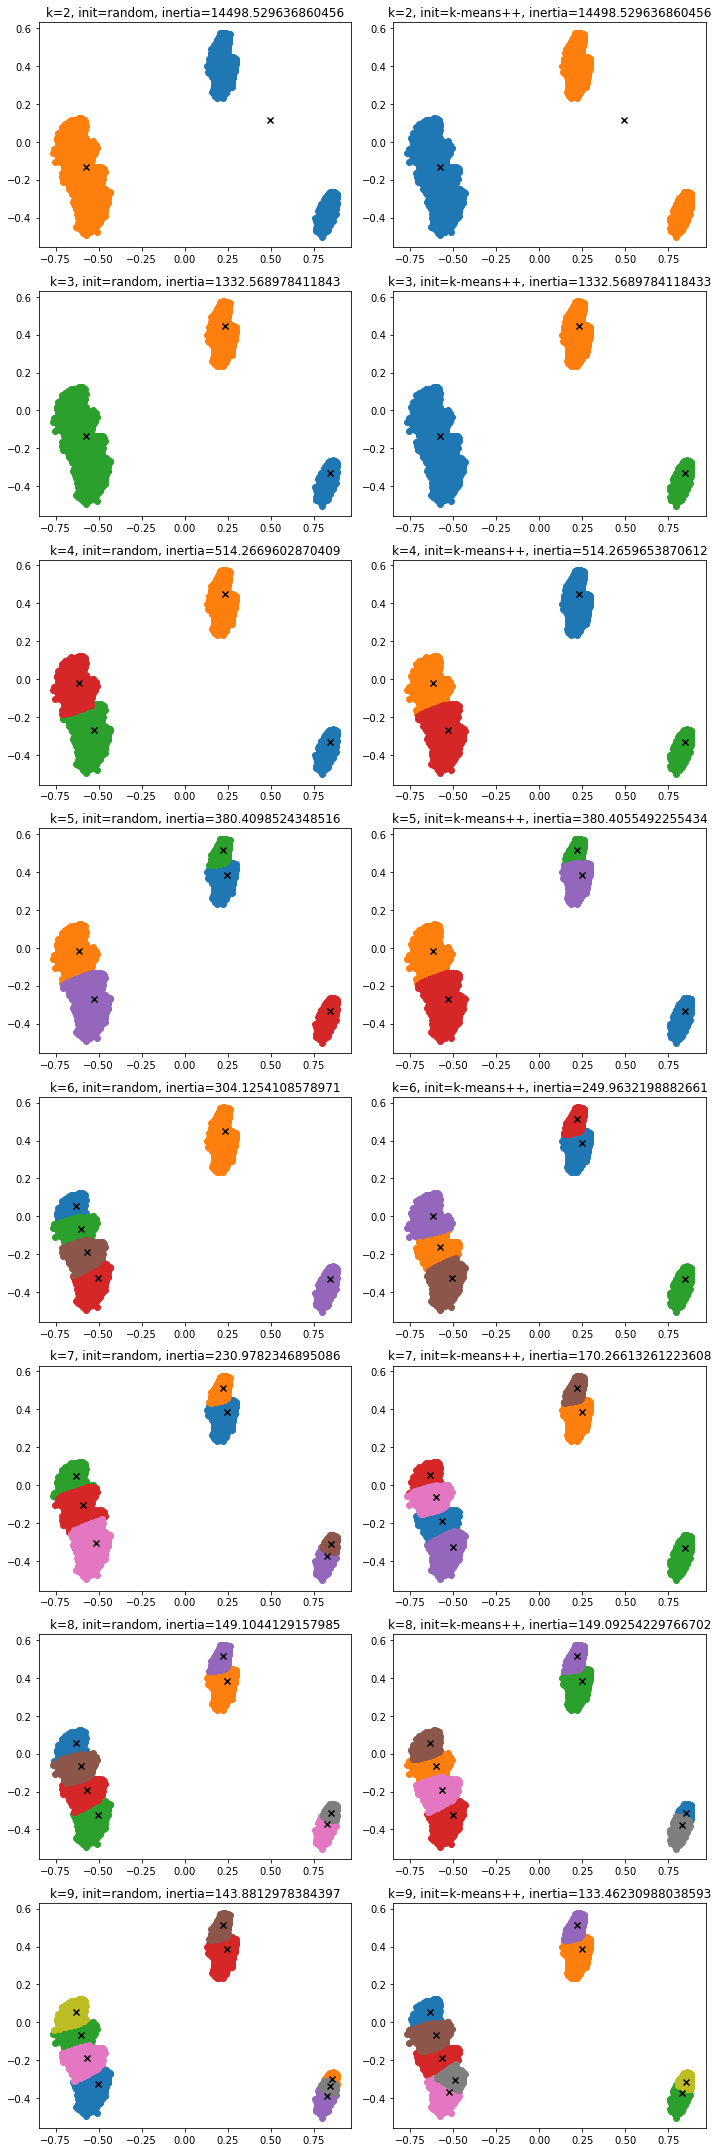

In [37]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

ks = range(2, 10)  # Uključuje gornju granicu (X.shape[0])
inits = ['random', 'k-means++']
fig = plt.figure(figsize=(10, 30))
idx = 1
silhouette = []
inertias = []

for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init)
        kmeans.fit(X)
        
        if init == 'k-means++':
            inertias.append(kmeans.inertia_)
            silhouette.append(silhouette_score(X, kmeans.labels_))

        ax = fig.add_subplot(len(ks), len(inits), idx)
        idx += 1
        
        for label in range(k):
            cluster = X[kmeans.labels_ == label]
            ax.scatter(cluster[:, 0], cluster[:, 1])
        
        centroids = pd.DataFrame(kmeans.cluster_centers_, columns=pca_names)
        ax.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], color='black', marker='x')
        
        ax.set_title(f'k={k}, init={init}, inertia={kmeans.inertia_}')

plt.tight_layout()
plt.show()


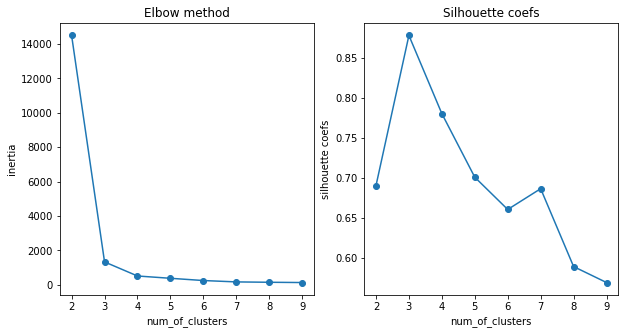

In [40]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ks, inertias, marker='o')
plt.ylabel('inertia')
plt.xlabel('num_of_clusters')
plt.title('Elbow method')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouette, marker="o")
plt.ylabel('silhouette coefs')
plt.xlabel('num_of_clusters')
plt.title('Silhouette coefs')

plt.show()

In [39]:
silhouette


[0.6901422015459283,
 0.8775713666714129,
 0.7800675335193603,
 0.7007531357540389,
 0.6605090922064515,
 0.686420506712591,
 0.5892722427606666,
 0.5693753869475968]

In [51]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# P
clustering = AgglomerativeClustering(n_clusters=3)

# Fitovanje podataka na model
clustering.fit(X)

# Dobijanje obeležja klastera za svaki podatak
cluster_labels = clustering.labels_

# Prikaz rezultata klasterovanja
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.show()


MemoryError: unable to allocate array data.